# Simple Linear Regression

$ \Large\ Y_1 = \beta_0 + \beta_1X_1 + \varepsilon$

Simple linear regression is a statistical method that we can use to find a relationship between two variables and make predictions.
<br> Let $X:= (X_1,X_2,...,X_p)$ denote the input variables and $Y$ denote the output variable
<br> To find the best fitting graph, we have to calculate the **RSS (Residual Sum of Error)** of the model

$\Large\ RSS = \Sigma_{i=1}(Y_i-(\beta_1x_i + \beta_0))^2 $

Geometrically, this is the distance between the model's regression line and the actual data. An optimal model would have the least amount of distance between the line and the data.

To evaluate how efficient a model is, we can use $R^2$. It is a is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by variables in a regression model. In other words, it shows how well the variance of the original data is explained by the model.

$\Large\ R^2 = 1-{RSS \over TSS}$ 

$TSS$ is the total sum square of the data. (Total variance) A value of $R² = 1$ indicates that all sample observations are only on the estimated regression line, which means that the estimated regression line fully explains the relationship between the variables.

# Using linear regression to predict housing price

Suppose we are given a data housing prices, and the features of each house such as size, number of bedrooms, area, etc. We use Python, together with the help of some libraries, to analyze the pattern of the price. In particular, how would the price depends on various features. In this way, we can pridict the price of a house based on the known features.

In [3]:
# importing tools 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, feature_extraction
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
sales = pd.read_csv('kc_house_data.csv')
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


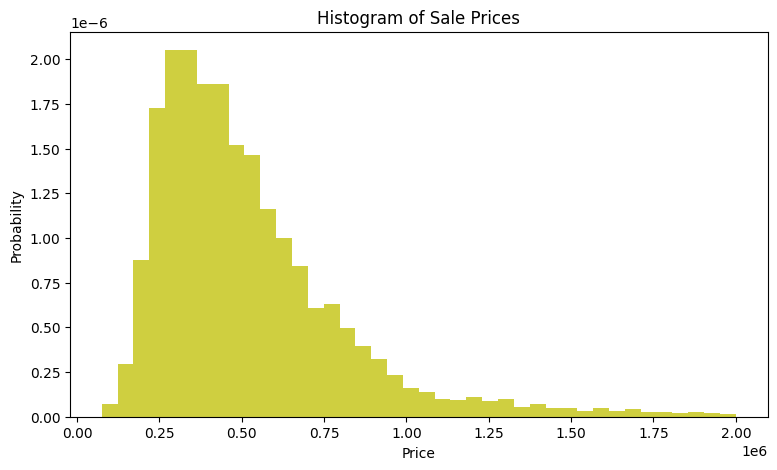

In [5]:
# the histogram of the sales price
# Replace price by a range
fig, ax = plt.subplots(figsize=(9, 5))
n, bins, patches = plt.hist(sales.price[sales.price<2000000], 40, density=True, facecolor='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Histogram of Sale Prices')
plt.show()

Let's now split the data into train and test, randomly

In [8]:
# Splitting the data 80:20
msk = np.random.rand(len(sales)) < 0.8 
msk

array([ True, False,  True, ...,  True,  True, False])

In [9]:
sales_train = sales[msk]
sales_test = sales[~msk]

In [10]:
sales_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [11]:
sales_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000
21584,952006823,20141202T000000,380000.0,3,2.50,1260,900,2.0,0,0,...,7,940,320,2007,0,98116,47.5621,-122.384,1310,1415
21590,7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21592,1931300412,20150416T000000,475000.0,3,2.25,1190,1200,3.0,0,0,...,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224


In [12]:
print (len(sales), len(sales_train), len(sales_train)/len(sales))

21613 17294 0.8001665664183594


# Building the simple linear regression model

Let's make a simple regression between "sqft_living" and "price"

### 1. build an abstract regression model

In [13]:
model = linear_model.LinearRegression()

### 2. convert `pandas.series` to `numpy.array`

In [14]:
X_train = sales_train['sqft_living'].values.reshape(-1,1)
Y_train = sales_train['price'].values

What should be noted here is that `values.reshape(-1,1)` was used when putting X data. Because X has to be a two-dimensional array.<br> Like this `[[x1], [x2], [x3], ..., [xn]]`. 
<br>The reason for putting it in this way is to perform multiple regression analysis later when there are more than one X variable, rather than one X variable.

In [15]:
X_train.shape

(17294, 1)

In [16]:
Y_train.shape

(17294,)

In [17]:
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
print(model.coef_,model.intercept_)

[280.60010175] -43964.94371428888


The fit() method conveys two variables necessary for a linear regression model.
- slope : `model.coef_`
- y intercept : `model.intercept_`

In [19]:
y_predicted = model.predict(X_train)

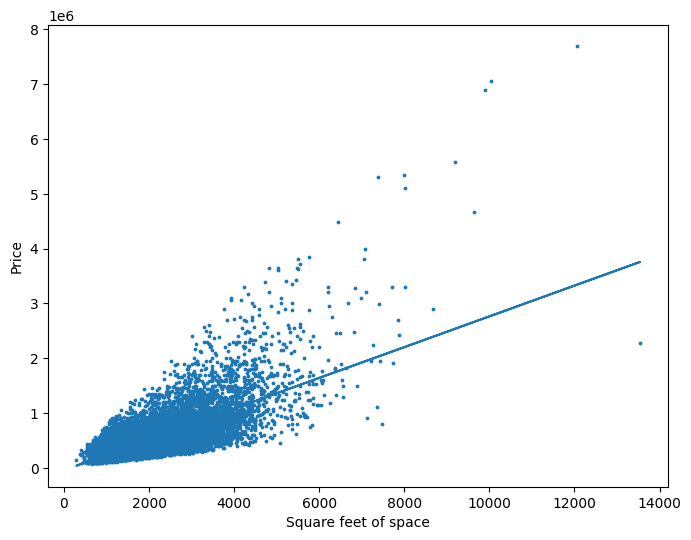

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train,s=3)
plt.xlabel('Square feet of space')
plt.ylabel('Price')
plt.plot(X_train,y_predicted)
plt.show()

# Analysis

In [21]:
# Based on the training data
Y_fit = model.predict(X_train)

#Predict the price of a house that has 7000 sqft living space
model.predict([[7000]])

array([1920235.76853531])

In [22]:
# Let's see how well the model fits the training data
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(Y_train, Y_fit))

print("square root of mean squared error: $%.2f"
      % np.sqrt(metrics.mean_squared_error(Y_train, Y_fit)))

# Explained R2 score: 1 is perfect prediction
print('R2 score: %.2f' % metrics.r2_score(Y_train, Y_fit))

Mean squared error: 67762678132.43
square root of mean squared error: $260312.65
R2 score: 0.50


In [26]:
# Based on the test data
X_test = sales_test['sqft_living'].values.reshape(-1,1)
Y_test = sales_test['price'].values

# get the fitted values and predicted values
Y_pred = model.predict(X_test)

# Let's see how well the data fit
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(Y_test, Y_pred))

print("square root of mean squared error: $%.2f"
      % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# Explained R2 score: 1 is perfect prediction
print('R2 score: %.2f' % metrics.r2_score(Y_test, Y_pred))

Mean squared error: 70709115324.33
square root of mean squared error: $265911.86
R2 score: 0.48
